### Text Mining.



```
# libraries import
```



In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download(["stopwords",
               "punkt",
               "wordnet",
               "omw-1.4",
               "vader_lexicon"])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




```
# Dataset import
```



In [208]:
ds = pd.read_csv("tourist_accommodation_reviews.csv",encoding="Windows-1252")


Importing the Dataset gives the **UnicodeDecodeError:** *'utf-8' codec can't decode byte 0x92 in position 2455: invalid start byte*.

This is as a result of 0x92 being a smart quote(’) of Windows-1252. 0x92 doesn't exist in the encoding UTF-8. One of the ways to resolve this is to use the windows 1252 encoding or to update the smart quote to a normal quote.

Ref: https://stackoverflow.com/questions/29419322/unicodedecodeerror-utf8-codec-cant-decode-byte-0x92-in-position-377826-inva

**Exploring the Data Frame**

In [209]:
ds.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [210]:
ds

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [211]:
ds.shape

(53644, 5)

In [274]:
ds.info

<bound method DataFrame.info of                 ID               Review Date Location  \
0      rn579778340      Reviewed 1 week ago     Kathu   
1      rn576350875     Reviewed 3 weeks ago     Kathu   
2      rn574921678     Reviewed 4 weeks ago     Kathu   
3      rn572905503  Reviewed April 12, 2018     Kathu   
4      rn572364712  Reviewed April 10, 2018     Kathu   
...            ...                       ...      ...   
53639  rn162368197    Reviewed May 29, 2013    Patong   
53640  rn161843734    Reviewed May 25, 2013    Patong   
53641  rn161734077    Reviewed May 24, 2013    Patong   
53642  rn161218072    Reviewed May 19, 2013    Patong   
53643  rn161212765    Reviewed May 19, 2013    Patong   

               Hotel/Restaurant name  \
0      Thong Dee The Kathu Brasserie   
1      Thong Dee The Kathu Brasserie   
2      Thong Dee The Kathu Brasserie   
3      Thong Dee The Kathu Brasserie   
4      Thong Dee The Kathu Brasserie   
...                              ...   
536

**Filtering and Selecting Specific (30) Rows from the Dataframe**

The Class label (reviews/rows) are primarily grouped by the Attributes: "**Review Date**, **Location**, and **Hotel/Restaurant Name**".

First step, is to select an Attribute (a column Name), by which the 30 Class label (reviews/rows) will eventually be filtered out.

The selected Attribute is "Hotel/Restaurant Name". Therefore when the 30 reviews are eventually selected, the filtering will be based on the "Hotel/Restaurant Name"



```
# Selecting a single column.
```



In [212]:
h_r = ds["Hotel/Restaurant name"]

In [213]:
h_r

0        Thong Dee The Kathu Brasserie
1        Thong Dee The Kathu Brasserie
2        Thong Dee The Kathu Brasserie
3        Thong Dee The Kathu Brasserie
4        Thong Dee The Kathu Brasserie
                     ...              
53639                          Bite in
53640                          Bite in
53641                          Bite in
53642                          Bite in
53643                          Bite in
Name: Hotel/Restaurant name, Length: 53644, dtype: object



```
# Selecting rows based on a conditional expression (==).


```



In [214]:
res = ds[ds["Hotel/Restaurant name"]=="EAT. bar & grill"]

The condition inside the selection brackets ds["Hotel/Restaurant name"] == "EAT. bar & grill" checks for which rows the "Hotel/Restaurant name" column has a value exactly equivalent to "EAT. bar & grill".



```
# Exploring the res DataFrame
```



In [215]:
res

,ID,Review Date,Location,Hotel/Restaurant name,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,This place prides it’s self on only serving th...
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 Thai Bhat for a simply delicious mojito! I ...
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,Very trendy place to have your a meal Staff we...
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"Best food, starter start with bruschetta and f..."
...,...,...,...,...,...
588,rn550604314,"Reviewed January 1, 2018",Karon Beach,EAT. bar & grill,We saved the best for last! After a week in Ka...
589,rn550351113,"Reviewed December 30, 2017",Karon Beach,EAT. bar & grill,"We went to Eat with our 10-year-old, and loved..."
590,rn550312641,"Reviewed December 30, 2017",Karon Beach,EAT. bar & grill,My wife and I phoned from home in England to b...
591,rn549920709,"Reviewed December 29, 2017",Karon Beach,EAT. bar & grill,Most amazing Chateaubriand ever tasted!Being f...




```
#  Checking the shape attribute of the resulting DataFrame == "EAT. bar & grill":
```



In [216]:
res.shape

(100, 5)



```
# Selecting 30 rows from the res (Hotel/Restaurant name) dataFrame
```



In [217]:
res_30 = res.loc[492:522, ]

When specifically interested in certain rows and/or columns based on their position in the table, iloc/loc operator in front of the selection brackets [] can be used.

Python numbering starts from 0 hence, the 492 positioning index 493 and 522 positioning index 523.

In [218]:
res_30.head(3)

,ID,Review Date,Location,Hotel/Restaurant name,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,This place prides it’s self on only serving th...
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 Thai Bhat for a simply delicious mojito! I ...




```
# Having a look at the shape of and exploring the output:
```



In [219]:
res_30.shape

(30, 5)

In [220]:
res_30

,ID,Review Date,Location,Hotel/Restaurant name,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,This place prides it’s self on only serving th...
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 Thai Bhat for a simply delicious mojito! I ...
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,Very trendy place to have your a meal Staff we...
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"Best food, starter start with bruschetta and f..."
498,rn575839672,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,We were here with our family for family dinner...
499,rn575675352,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,Been in Thailand for 16 nights and have been T...
500,rn575630557,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,Burgers were good. Meat is high quality but co...
501,rn575547861,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,Well what can I say about this place it is the...
502,rn575079151,Reviewed 4 weeks ago,Karon Beach,EAT. bar & grill,2700 baht for a mixed grill!! I feel that this...


In [221]:
res_30.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,30,30,30,30,30
unique,30,15,1,1,30
top,rn581330980,Reviewed 4 weeks ago,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...
freq,1,6,30,30,1


In [222]:
res_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 493 to 522
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     30 non-null     object
 1   Review Date            30 non-null     object
 2   Location               30 non-null     object
 3   Hotel/Restaurant name  30 non-null     object
 4   Review                 30 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


**Data Transformation**



```
# Data transformation
```



In [223]:
res_30['Review']

493    I was excited to finally come here and try the...
494    This place prides it’s self on only serving th...
495    99 Thai Bhat for a simply delicious mojito! I ...
496    Very trendy place to have your a meal Staff we...
497    Best food, starter start with bruschetta and f...
498    We were here with our family for family dinner...
499    Been in Thailand for 16 nights and have been T...
500    Burgers were good. Meat is high quality but co...
501    Well what can I say about this place it is the...
502    2700 baht for a mixed grill!! I feel that this...
503    I went 2 times already this month. Love it !!!...
504    I was surprised at just how good this place wa...
505    We came across EAT 3 days before we were due t...
506    Probably the best steak I've ever had. Highly ...
507    This is my second time visiting EAT, having be...
508    I haven’t been here in a while but I have to s...
509    Had our 3rd trip to Phuket and just had to go ...
510    Couldn’t recommend Eat B

In [224]:
# res_30["Review"] = res_30["Review"].astype(str)
# res_30.head()



```
# Data transformation
```





```
# Changing the Review column to string type and lowercase
```



In [225]:
res_30["Review"] = res_30["Review"].astype(str).str.lower()
res_30.head()

<ipython-input-225-b2a0bfe1dec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["Review"] = res_30["Review"].astype(str).str.lower()


,ID,Review Date,Location,Hotel/Restaurant name,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,i was excited to finally come here and try the...
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,this place prides it’s self on only serving th...
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 thai bhat for a simply delicious mojito! i ...
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,very trendy place to have your a meal staff we...
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"best food, starter start with bruschetta and f..."




```
# tokenization
```



In **TOKENIZATION**, We use NLTK’s RegexpTokenizer to perform tokenization in combination with regular expressions.

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
------------------------------------------
------------------------------------------

\w+ matches Unicode word characters with one or more occurrences;

In [226]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

res_30['reviews'] = res_30['Review'].apply(regexp.tokenize)
res_30

<ipython-input-226-4be2361a162a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30['reviews'] = res_30['Review'].apply(regexp.tokenize)


,ID,Review Date,Location,Hotel/Restaurant name,Review,reviews
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,i was excited to finally come here and try the...,"[i, was, excited, to, finally, come, here, and..."
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,this place prides it’s self on only serving th...,"[this, place, prides, it, s, self, on, only, s..."
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 thai bhat for a simply delicious mojito! i ...,"[99, thai, bhat, for, a, simply, delicious, mo..."
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,very trendy place to have your a meal staff we...,"[very, trendy, place, to, have, your, a, meal,..."
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"best food, starter start with bruschetta and f...","[best, food, starter, start, with, bruschetta,..."
498,rn575839672,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,we were here with our family for family dinner...,"[we, were, here, with, our, family, for, famil..."
499,rn575675352,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,been in thailand for 16 nights and have been t...,"[been, in, thailand, for, 16, nights, and, hav..."
500,rn575630557,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,burgers were good. meat is high quality but co...,"[burgers, were, good, meat, is, high, quality,..."
501,rn575547861,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,well what can i say about this place it is the...,"[well, what, can, i, say, about, this, place, ..."
502,rn575079151,Reviewed 4 weeks ago,Karon Beach,EAT. bar & grill,2700 baht for a mixed grill!! i feel that this...,"[2700, baht, for, a, mixed, grill, i, feel, th..."


After tokenizing and inspecting the **review** text, it's obvious that punctuations have been removed, apart from the apostrophe in isn’t. 



```
# Stopwords
```



**STOP WORDS** are words in a stop list which are dropped before analysing natural language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, …).

NLTK also provides a corpus of stopwords which we can use to remove stopwords from our tokenized text.

We can use either a **lambda function**, **for loop**, or a **list comprehension** method to remove stopwords.

In [227]:
stop_words = nltk.corpus.stopwords.words("english")

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '



```
# Remove stopwords
```



In [228]:
res_30["reviews"] = res_30["reviews"].apply(lambda x: [item for item in x if item not in stop_words])
res_30

<ipython-input-228-6fe897c165a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["reviews"] = res_30["reviews"].apply(lambda x: [item for item in x if item not in stop_words])


,ID,Review Date,Location,Hotel/Restaurant name,Review,reviews
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,i was excited to finally come here and try the...,"[excited, finally, come, try, food, pictures, ..."
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,this place prides it’s self on only serving th...,"[place, prides, self, serving, best, quality, ..."
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 thai bhat for a simply delicious mojito! i ...,"[99, thai, bhat, simply, delicious, mojito, kn..."
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,very trendy place to have your a meal staff we...,"[trendy, place, meal, staff, friendly, food, f..."
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"best food, starter start with bruschetta and f...","[best, food, starter, start, bruschetta, foil,..."
498,rn575839672,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,we were here with our family for family dinner...,"[family, family, dinner, made, reservation, pr..."
499,rn575675352,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,been in thailand for 16 nights and have been t...,"[thailand, 16, nights, eats, bar, grill, 5, ti..."
500,rn575630557,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,burgers were good. meat is high quality but co...,"[burgers, good, meat, high, quality, could, bi..."
501,rn575547861,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,well what can i say about this place it is the...,"[well, say, place, best, place, eaten, food, a..."
502,rn575079151,Reviewed 4 weeks ago,Karon Beach,EAT. bar & grill,2700 baht for a mixed grill!! i feel that this...,"[2700, baht, mixed, grill, feel, restaurant, h..."




```
# Removing infrequent words
```



So I suppose the question is:

**Why do we remove frequent and infrequent words when in NLP?**

This is because they barely offer anything important or interesting.

Frequent words for instance are usually and most likely bereft of meaning, which most likely results to also providing very little to no semantic content, which barely change the meaning of the document. Since these frequent words have an unnecessarily high count, most scoring functions are recognized for predicting their counts more than they are recognized for predicting other words, thereby making other words look rare. 

In summary, frequent words account for the bias of scoring functions. 

Rare words however are taken out for their rareness. Due to their sometimes extreme scarcity, the relationship between them and other words is drowned by noise. It's like if there is a presence of a rare word in a document, it's blended in with the words around it, thereby loosing its meaning. 

So, it's better to replace rare words with some more general form of them and this could make them have higher counts.

Ref: https://www.quora.com/Why-do-we-remove-frequent-and-infrequent-words-when-in-NLP




```
# First: change the format of **reviews** to string and 
I'll be keeping only words which are longer than 2 letters.
```



In [229]:
res_30["reviewstr"] = res_30["reviews"].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

<ipython-input-229-c7a84713a40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["reviewstr"] = res_30["reviews"].apply(lambda x: ' '.join([item for item in x if len(item)>2]))


In [230]:
res_30[["Review","reviews","reviewstr"]].head()

,Review,reviews,reviewstr
493,i was excited to finally come here and try the...,"[excited, finally, come, try, food, pictures, ...",excited finally come try food pictures looked ...
494,this place prides it’s self on only serving th...,"[place, prides, self, serving, best, quality, ...",place prides self serving best quality produce...
495,99 thai bhat for a simply delicious mojito! i ...,"[99, thai, bhat, simply, delicious, mojito, kn...",thai bhat simply delicious mojito know regular...
496,very trendy place to have your a meal staff we...,"[trendy, place, meal, staff, friendly, food, f...",trendy place meal staff friendly food freash a...
497,"best food, starter start with bruschetta and f...","[best, food, starter, start, bruschetta, foil,...",best food starter start bruschetta foil gras c...




```
# Second: Create a list of all words.
```



In [231]:
all_words = " ".join([word for word in res_30["reviewstr"]])



```
# Third: Tokenize all the created list of words. 
```



In [232]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)



```
# A **Frequency Distribution (Scoring Function** is then created to 
count the number of times each word occurs.
```



In [233]:
from nltk import FreqDist

f_dist = FreqDist(tokenized_words)

f_dist

FreqDist({'009f': 18, 'food': 15, 'great': 13, 'amazing': 11, 'steak': 11, 'service': 10, 'best': 9, 'place': 8, 'phuket': 8, 'staff': 8, ...})

The created **f_dist dictionary** can be used to drop words which occur lesser than a certain frequency number -usually a value between 3-4.

However, I'm only analysing 30 reviews, which is quite minuscule , so I won't be filtering out any word; Greater or equal to one (1) will do.

In [234]:
res_30["reviewstr_fdist"] = res_30["reviews"].apply(lambda x: " ".join([item for item in x if f_dist[item]>=1]))

<ipython-input-234-0f470849933f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["reviewstr_fdist"] = res_30["reviews"].apply(lambda x: " ".join([item for item in x if f_dist[item]>=1]))


In [235]:
res_30[["Review","reviews","reviewstr","reviewstr_fdist"]].head(7)

,Review,reviews,reviewstr,reviewstr_fdist
493,i was excited to finally come here and try the...,"[excited, finally, come, try, food, pictures, ...",excited finally come try food pictures looked ...,excited finally come try food pictures looked ...
494,this place prides it’s self on only serving th...,"[place, prides, self, serving, best, quality, ...",place prides self serving best quality produce...,place prides self serving best quality produce...
495,99 thai bhat for a simply delicious mojito! i ...,"[99, thai, bhat, simply, delicious, mojito, kn...",thai bhat simply delicious mojito know regular...,thai bhat simply delicious mojito know regular...
496,very trendy place to have your a meal staff we...,"[trendy, place, meal, staff, friendly, food, f...",trendy place meal staff friendly food freash a...,trendy place meal staff friendly food freash a...
497,"best food, starter start with bruschetta and f...","[best, food, starter, start, bruschetta, foil,...",best food starter start bruschetta foil gras c...,best food starter start bruschetta foil gras c...
498,we were here with our family for family dinner...,"[family, family, dinner, made, reservation, pr...",family family dinner made reservation prior bi...,family family dinner made reservation prior bi...
499,been in thailand for 16 nights and have been t...,"[thailand, 16, nights, eats, bar, grill, 5, ti...",thailand nights eats bar grill times good 009f...,thailand nights eats bar grill times good 009f...




```
# Performing Lemmatization
```



**LEMMATIZATION** is the process of identifying the **lemma (the dictionary form, the root form)** of a word. 

in simple terms, it links words word with similar meaning into one word.

it's not a perfect algorithm, but for the purpose of this work, it will serve.

In [236]:
# nltk.download("wordnet")
# nltk.download("omw-1.4")

In [237]:
# from nltk import WordNetLemmatizer   ***

# lemmatizer = nltk.stem.WordNetLemmatizer()
# stemmer = nltk.stem.PorterStemmer

# words = ["cacti","sings","hopped","rocks","better","easily"]
# pos = ["n","v","v","n","a","r"]

# lemmatized_words = [lemmatizer.lemmatize(words[i],pos=pos[i])for i in range(6)]
# stemmed_words = [stemmer.stem(word) for word in words]

# print("Lemmatized words:", lemmatized_words)
# print("Stemmed words: ",stemmed_words)

In [238]:
from nltk import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
res_30["reviewstr_lem"] = res_30["reviewstr_fdist"].apply(wordnet_lem.lemmatize)

<ipython-input-238-118aafa7a12d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["reviewstr_lem"] = res_30["reviewstr_fdist"].apply(wordnet_lem.lemmatize)


NB In some datasets, there are no words to lemmatize. 

For confirmation:

In [275]:
res_30[["Review","reviews","reviewstr","reviewstr_fdist","reviewstr_lem"]].tail(7)

,Review,reviews,reviewstr,reviewstr_fdist,reviewstr_lem
516,"i’m 42 years old, i’ve eaten more steaks than ...","[42, years, old, eaten, steaks, care, remember...",years old eaten steaks care remember easily sa...,years old eaten steaks care remember easily sa...,years old eaten steaks care remember easily sa...
517,the restaurant was full when we were there so ...,"[restaurant, full, thinking, made, good, choic...",restaurant full thinking made good choice orde...,restaurant full thinking made good choice orde...,restaurant full thinking made good choice orde...
518,we have some amazing steak in melbourne austra...,"[amazing, steak, melbourne, australia, say, st...",amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...
519,"excellent, cosmopolitan western menu. had no r...","[excellent, cosmopolitan, western, menu, reser...",excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...
520,we visited here on our first night in phuket. ...,"[visited, first, night, phuket, dined, thai, f...",visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...
521,"after reading such great reviews, i couldnt wa...","[reading, great, reviews, couldnt, wait, visit...",reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...
522,wonderful food <f0><u+009f><u+0098><u+008b><f0...,"[wonderful, food, f0, u, 009f, u, 0098, u, 008...",wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...


There are five (5) columns, and we could check for class imbalance.



```
# checking if Columns are equal
```



In [240]:
res_30["is_equal"] = (res_30["reviewstr_fdist"]==res_30["reviewstr_lem"])

<ipython-input-240-8d2cf1f58285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["is_equal"] = (res_30["reviewstr_fdist"]==res_30["reviewstr_lem"])


In [241]:
res_30.is_equal.value_counts()

True    30
Name: is_equal, dtype: int64

In [242]:
res_30.head(3)

,ID,Review Date,Location,Hotel/Restaurant name,Review,reviews,reviewstr,reviewstr_fdist,reviewstr_lem,is_equal
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,i was excited to finally come here and try the...,"[excited, finally, come, try, food, pictures, ...",excited finally come try food pictures looked ...,excited finally come try food pictures looked ...,excited finally come try food pictures looked ...,True
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,this place prides it’s self on only serving th...,"[place, prides, self, serving, best, quality, ...",place prides self serving best quality produce...,place prides self serving best quality produce...,place prides self serving best quality produce...,True
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 thai bhat for a simply delicious mojito! i ...,"[99, thai, bhat, simply, delicious, mojito, kn...",thai bhat simply delicious mojito know regular...,thai bhat simply delicious mojito know regular...,thai bhat simply delicious mojito know regular...,True




```
# Install wordcloud (though already installed at the start).
```





```
# tourist dining reviews gallery using Wordcloud 
```



In [243]:
# conda install -c conda-forge wordcloud

all_words_lem = " ".join([word for word in res_30["reviewstr_lem"]])

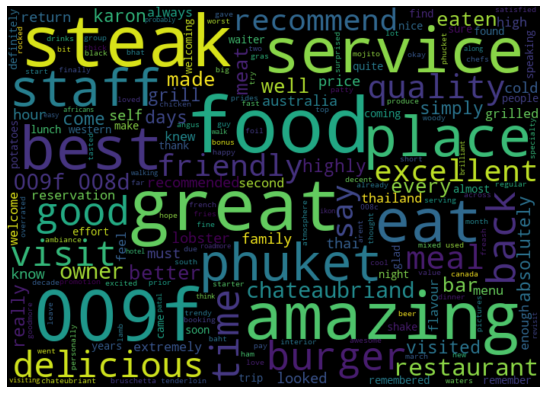

In [244]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

wordcloud = WordCloud(width=700, 
                     height=500, 
                     random_state=99, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');



```
# tourist dining experience reviews Visual
```



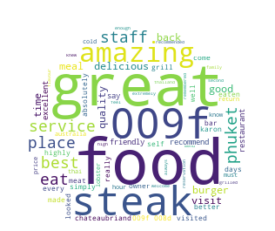

In [245]:
x, y = np.ogrid[:250, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");



```
# Generating a Term Frequency Matrix 
```



**TERM FREQUENCY MATRIX** takes the tokenized text and vectorizes it. This will be used to create a new DataFrame which will serve as features for a training model.

In [246]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(res_30["reviews"].map(' '.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [247]:
X.head(7)

,0080,0082,0083,0087,008a,008b,008c,008d,0091,0092,...,went,western,wife,wonderful,woody,working,world,worst,would,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [248]:
X.shape

(30, 353)



```
# Understanding what words were generated as columns by the vectorizer
```



In [284]:
terms = vectorizer.get_feature_names_out()

In [285]:
#terms



```
# Fitting kmeans to the dataset
```



**K-Means**

In [277]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 12,init='k-means++',random_state=99)
kmeans.fit_predict(X)

array([ 0,  8,  7,  0,  0, 11,  7,  0,  1, 10,  0,  0,  7,  0, 10,  0,  0,
        7,  0,  0,  0,  7,  2,  0,  4,  5,  9,  6,  0,  3], dtype=int32)

In [278]:
kmeans.labels_

array([ 0,  8,  7,  0,  0, 11,  7,  0,  1, 10,  0,  0,  7,  0, 10,  0,  0,
        7,  0,  0,  0,  7,  2,  0,  4,  5,  9,  6,  0,  3], dtype=int32)

In [279]:
from sklearn.decomposition import PCA

# reduce the features to 2D
pca = PCA(n_components=2, random_state=99)
reduced_features = pca.fit_transform(X)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


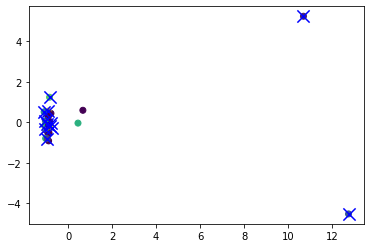

In [280]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')



```
# Frequency distributions
```



In [254]:
# nltk.download("punkt")

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
freq_dist = FreqDist(words)



```
# most common words
```



In [255]:
freq_dist.most_common(10)

[('009f', 18),
 ('food', 15),
 ('great', 13),
 ('amazing', 11),
 ('steak', 11),
 ('service', 10),
 ('best', 9),
 ('place', 8),
 ('phuket', 8),
 ('staff', 8)]

In [256]:
freq_dist.tabulate()

         009f          food         great       amazing         steak       service          best         place        phuket         staff           eat          good          back     delicious          0091          0098       quality      friendly     recommend     excellent           say         visit          008d    restaurant chateaubriand         owner          meat          meal          made          well           bar         times       burgers         eaten        better         every          come        burger           get        simply        highly    absolutely         grill         would          0080         karon          time          days       visited          ever        really        looked          self        steaks     australia          cold          must        return          thai          know         price   recommended        family     extremely          knew          menu       grilled      thailand        always          feel       welcome       



```
# Show frequency of a specific word
```



Search Specific Words

In [257]:
freq_dist["garlic"]

1

In [292]:
top_20 = freq_dist.most_common(20)

In [293]:
f_dist = pd.Series(dict(top_20))

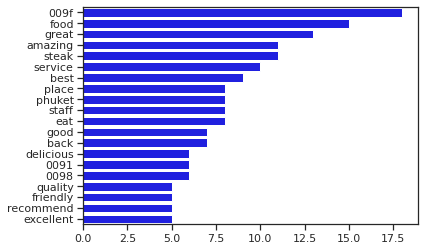

In [294]:
sns.set_theme(style="ticks")

sns.barplot(y=f_dist.index,x=f_dist.values,color="blue")

### Sentiment Analysis

In [258]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download("vader_lexicon")

analyzer = SentimentIntensityAnalyzer()



```
# Using the polarity_scores method
```



To generate **POLARITY SCORES** for the reviews in res_30 dataFrame, first initiate an object of SentimentIntensityAnalyzer as above.

A list comprehension or Lambda method can be used to create a new polarity scores column for each review from the dictionaries returned when we use the polarity_scores method.

In [259]:
res_30["polarity"] = res_30["reviewstr_lem"].apply(lambda x: analyzer.polarity_scores(x))

<ipython-input-259-66a0ad5f7bf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_30["polarity"] = res_30["reviewstr_lem"].apply(lambda x: analyzer.polarity_scores(x))


In [260]:
res_30.tail()


,ID,Review Date,Location,Hotel/Restaurant name,Review,reviews,reviewstr,reviewstr_fdist,reviewstr_lem,is_equal,polarity
518,rn570757047,"Reviewed April 3, 2018",Karon Beach,EAT. bar & grill,we have some amazing steak in melbourne austra...,"[amazing, steak, melbourne, australia, say, st...",amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,True,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp..."
519,rn570100741,"Reviewed April 1, 2018",Karon Beach,EAT. bar & grill,"excellent, cosmopolitan western menu. had no r...","[excellent, cosmopolitan, western, menu, reser...",excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,True,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
520,rn570043749,"Reviewed April 1, 2018",Karon Beach,EAT. bar & grill,we visited here on our first night in phuket. ...,"[visited, first, night, phuket, dined, thai, f...",visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,True,"{'neg': 0.084, 'neu': 0.842, 'pos': 0.074, 'co..."
521,rn570011459,"Reviewed March 31, 2018",Karon Beach,EAT. bar & grill,"after reading such great reviews, i couldnt wa...","[reading, great, reviews, couldnt, wait, visit...",reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,True,"{'neg': 0.115, 'neu': 0.511, 'pos': 0.374, 'co..."
522,rn569882352,"Reviewed March 31, 2018",Karon Beach,EAT. bar & grill,wonderful food <f0><u+009f><u+0098><u+008b><f0...,"[wonderful, food, f0, u, 009f, u, 0098, u, 008...",wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,True,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp..."


In [261]:
res_30.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review,reviews,reviewstr,reviewstr_fdist,reviewstr_lem,is_equal,polarity
count,30,30,30,30,30,30,30,30,30,30,30
unique,30,15,1,1,30,30,30,30,30,1,30
top,rn581330980,Reviewed 4 weeks ago,Karon Beach,EAT. bar & grill,i was excited to finally come here and try the...,"[excited, finally, come, try, food, pictures, ...",excited finally come try food pictures looked ...,excited finally come try food pictures looked ...,excited finally come try food pictures looked ...,True,"{'neg': 0.139, 'neu': 0.578, 'pos': 0.282, 'co..."
freq,1,6,30,30,1,1,1,1,1,30,1




```
# Changing the Data structure
```



Transforming the Data for easy computation.

In [262]:
res_30 = pd.concat(
    [res_30.drop(["ID","polarity"],axis=1),
    res_30["polarity"].apply(pd.Series)],axis=1
)

res_30.tail()

,Review Date,Location,Hotel/Restaurant name,Review,reviews,reviewstr,reviewstr_fdist,reviewstr_lem,is_equal,neg,neu,pos,compound
518,"Reviewed April 3, 2018",Karon Beach,EAT. bar & grill,we have some amazing steak in melbourne austra...,"[amazing, steak, melbourne, australia, say, st...",amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,True,0.000,0.692,0.308,0.8402
519,"Reviewed April 1, 2018",Karon Beach,EAT. bar & grill,"excellent, cosmopolitan western menu. had no r...","[excellent, cosmopolitan, western, menu, reser...",excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,True,0.000,0.556,0.444,0.9432
520,"Reviewed April 1, 2018",Karon Beach,EAT. bar & grill,we visited here on our first night in phuket. ...,"[visited, first, night, phuket, dined, thai, f...",visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,True,0.084,0.842,0.074,-0.0772
521,"Reviewed March 31, 2018",Karon Beach,EAT. bar & grill,"after reading such great reviews, i couldnt wa...","[reading, great, reviews, couldnt, wait, visit...",reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,True,0.115,0.511,0.374,0.7269
522,"Reviewed March 31, 2018",Karon Beach,EAT. bar & grill,wonderful food <f0><u+009f><u+0098><u+008b><f0...,"[wonderful, food, f0, u, 009f, u, 0098, u, 008...",wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,True,0.000,0.786,0.214,0.8977




```
# Using the sentiment analysis method
```



In [263]:
res_30["sentiment"] = res_30["compound"].apply(lambda x: "positive" if x>0 else "neutral" if x==0 else "negative")
res_30.tail()

,Review Date,Location,Hotel/Restaurant name,Review,reviews,reviewstr,reviewstr_fdist,reviewstr_lem,is_equal,neg,neu,pos,compound,sentiment
518,"Reviewed April 3, 2018",Karon Beach,EAT. bar & grill,we have some amazing steak in melbourne austra...,"[amazing, steak, melbourne, australia, say, st...",amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,amazing steak melbourne australia say steak al...,True,0.000,0.692,0.308,0.8402,positive
519,"Reviewed April 1, 2018",Karon Beach,EAT. bar & grill,"excellent, cosmopolitan western menu. had no r...","[excellent, cosmopolitan, western, menu, reser...",excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,excellent cosmopolitan western menu reservatio...,True,0.000,0.556,0.444,0.9432,positive
520,"Reviewed April 1, 2018",Karon Beach,EAT. bar & grill,we visited here on our first night in phuket. ...,"[visited, first, night, phuket, dined, thai, f...",visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,visited first night phuket dined thai food sin...,True,0.084,0.842,0.074,-0.0772,negative
521,"Reviewed March 31, 2018",Karon Beach,EAT. bar & grill,"after reading such great reviews, i couldnt wa...","[reading, great, reviews, couldnt, wait, visit...",reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,reading great reviews couldnt wait visit resta...,True,0.115,0.511,0.374,0.7269,positive
522,"Reviewed March 31, 2018",Karon Beach,EAT. bar & grill,wonderful food <f0><u+009f><u+0098><u+008b><f0...,"[wonderful, food, f0, u, 009f, u, 0098, u, 008...",wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,wonderful food 009f 0098 008b 009f 0098 008a r...,True,0.000,0.786,0.214,0.8977,positive


In [264]:
res_30[["compound","neg","neu","pos"]].describe()

,compound,neg,neu,pos
count,30.000000,30.000000,30.000000,30.000000
mean,0.842617,0.019967,0.555233,0.424700
std,0.210263,0.039064,0.124124,0.130826
min,-0.077200,0.000000,0.345000,0.074000
25%,0.840200,0.000000,0.473500,0.337000
50%,0.902600,0.000000,0.556000,0.406000
75%,0.944625,0.027000,0.638250,0.526500
max,0.979600,0.139000,0.842000,0.650000


From the Polarity Scores, as well as the sentiment analysis, it's clear that the scores and hence the reviews are basically positive. 

The median compound score of 0.90 implies quite a strong positive sentiment.



```
# Visual of the distribution of the compound scores
```



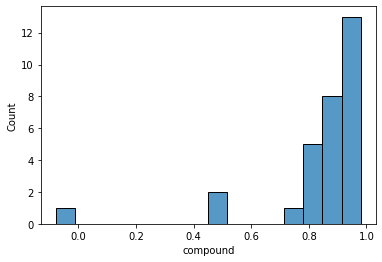

In [265]:
sns.histplot(res_30["compound"])

**Visuals** of the distribution of 'pos' and 'neg' scores



```
# histplot
```



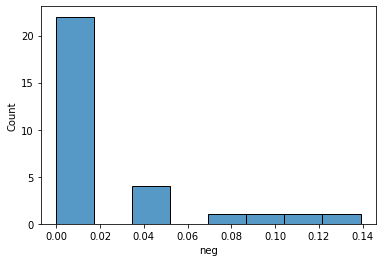

In [266]:
sns.histplot(res_30["neg"])

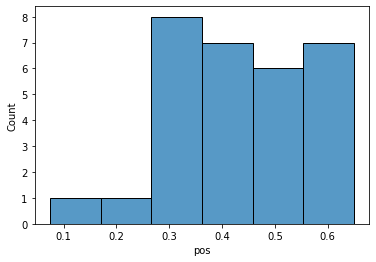

In [267]:
sns.histplot(res_30["pos"])



```
# Boxplot
```



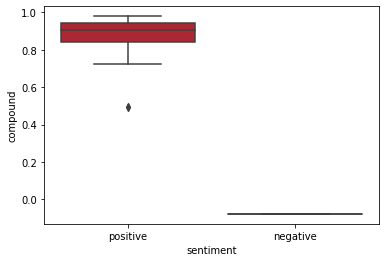

In [268]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=["#c1121f","#669bbc","#ae2012"], 
            data=res_30);



```
# countplot
```



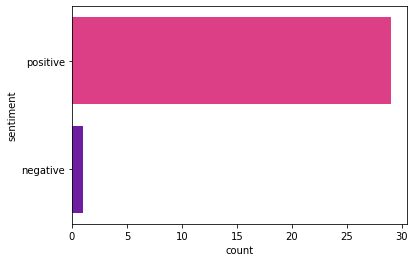

In [269]:
sns.countplot(y="sentiment",
              data=res_30,
              palette=["#f72585","#7209b7","#4361ee"]
              );



```
# Lineplot
```



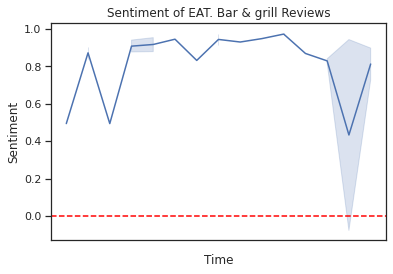

In [298]:
g = sns.lineplot(x="Review Date",y="compound",data=res_30)

g.set(xticklabels=[]) 
g.set(title='Sentiment of EAT. Bar & grill Reviews')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'red');



```
# Analysing Data
```



Carrying out a Sentiment Analysis means being interested in grasping how sentiments vary across different products, services, brands, or businesses. Also, it helps generate a positive or negative correlation across reviews.



```
# Reviews with highest positive sentiment
```



In [303]:
res_30.loc[res_30["compound"].idxmax()].values

array(['Reviewed April 7, 2018 ', ' Karon Beach', 'EAT. bar & grill',
       'perfectly cooked and very delicious, flavourful burgers for lunch. mango shake and lemon shakes also excellent.\r\na really friendly and funny waiter helped us make our selection... will come back again for sure.\r\nthanks for a great lunch!\r\nmichelle & mikemore',
       list(['perfectly', 'cooked', 'delicious', 'flavourful', 'burgers', 'lunch', 'mango', 'shake', 'lemon', 'shakes', 'also', 'excellent', 'really', 'friendly', 'funny', 'waiter', 'helped', 'us', 'make', 'selection', 'come', 'back', 'sure', 'thanks', 'great', 'lunch', 'michelle', 'mikemore']),
       'perfectly cooked delicious flavourful burgers lunch mango shake lemon shakes also excellent really friendly funny waiter helped make selection come back sure thanks great lunch michelle mikemore',
       'perfectly cooked delicious flavourful burgers lunch mango shake lemon shakes also excellent really friendly funny waiter helped make selection co



```
# Reviews with highest negative sentiment
```



In [272]:
res_30.loc[res_30["compound"].idxmin()].values

array(['Reviewed April 1, 2018 ', ' Karon Beach', 'EAT. bar & grill',
       "we visited here on our first night in phuket. we had dined on thai food since arriving in bangkok three days earlier and were craving something different.\r\nwe struggled to find a restaurant as everywhere seemed to specialise in all cuisines...which doesn't always bode well....more",
       list(['visited', 'first', 'night', 'phuket', 'dined', 'thai', 'food', 'since', 'arriving', 'bangkok', 'three', 'days', 'earlier', 'craving', 'something', 'different', 'struggled', 'find', 'restaurant', 'everywhere', 'seemed', 'specialise', 'cuisines', 'always', 'bode', 'well']),
       'visited first night phuket dined thai food since arriving bangkok three days earlier craving something different struggled find restaurant everywhere seemed specialise cuisines always bode well',
       'visited first night phuket dined thai food since arriving bangkok three days earlier craving something different struggled find restauran

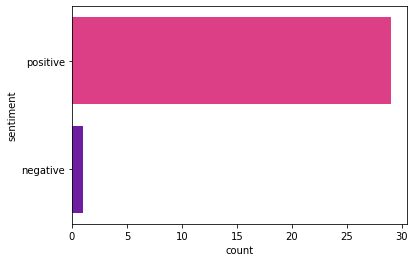

In [273]:
sns.countplot(y="sentiment",
              data=res_30,
              palette=["#f72585","#7209b7","#3a0ca3"]
              );

Reference

Hutto, C., & Gilbert, E. (2014). VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text. Proceedings of the International AAAI Conference on Web and Social Media, 8(1), 216-225. https://doi.org/10.1609/icwsm.v8i1.14550

Hutto, C. and Gilbert, E. (2014) “VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text”, Proceedings of the International AAAI Conference on Web and Social Media, 8(1), pp. 216-225. doi: 10.1609/icwsm.v8i1.14550.

Gauri Rao, Chanchal Agarwal, Snehal Chaudhry, Nikita Kulkarni, Dr. S.H. Patil, “Natural Language Processing using Semantic Grammar”, (IJCSE) International Journal on Computer Science and Engineering Vol. 02, No. 02, 2010, pp. 219-223 